<a href="https://colab.research.google.com/github/rtajeong/Kyungnam_univ_M4/blob/main/lab_57_tensorflow_1x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensors
- 텐서플로 프로그램은 tf.Tensor 객체 그래프를 만드는 것으로 먼저 시작하고, 각각의 텐서가 다른 텐서를 기반으로 어떤 식으로 계산될 수 있는지 구체화하고, 그 다음 그래프를 실행해서 원하는 결과를 얻게 됩니다.
- tf.Tensor는 다음과 같은 속성을 가지고 있습니다:

  - data type (예를 들어, float32 또는 int32, string)
  - 형태(shape)
- 텐서안의 각각 원소는 동일한 자료형이며 핵심 텐서는 다음과 같음. 
  - constant: values that don’t change.
  - placeholders: values that are unassigned (will be initialized by the session when you run it)
  - Variables:  values that can change
  - tf.SparseTensor: 

In [ ]:
# colab has both versions
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
# import tensorflow.compat.v1 as tf
# tf.compat.v1.disable_eager_execution()
# tf.__version__

## Basic exercise

In [ ]:
# basic exercise
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])
result = tf.multiply(x1, x2) 
print(result)   # just define a model (not calculated) 

Tensor("Mul:0", shape=(4,), dtype=int32)


In [ ]:
# if you want to see the result value?
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

result = tf.multiply(x1, x2)
print(result)

sess = tf.Session()  # Intialize the Session
print(sess.run(result)) # Print the result

sess.close()  # Close the session

Tensor("Mul_3:0", shape=(4,), dtype=int32)
[ 5 12 21 32]


In [ ]:
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Initialize Session and run `result`
with tf.Session() as sess:
  output = sess.run(result)
  print(output)

[ 5 12 21 32]


## Tensor Basic variables
- 최소 한 개 이상의 열과 행으로 구성

In [ ]:
c0 = tf.constant(2.7)
c1 = tf.constant([1,2,3])
c0, type(c0), c1, type(c1)

(<tf.Tensor 'Const_11:0' shape=() dtype=float32>,
 tensorflow.python.framework.ops.Tensor,
 <tf.Tensor 'Const_12:0' shape=(3,) dtype=int32>,
 tensorflow.python.framework.ops.Tensor)

In [ ]:
# all rank 0 (with initial values)
# 문자열은 문자 시퀀스가 아니고 단일 객체로 다루어짐.
mammal = tf.Variable("코끼리", tf.string)
ignition = tf.Variable(451, tf.int16)
floating = tf.Variable(3.14159265359, tf.float64)
its_complicated = tf.Variable(12.3 - 4.85j, tf.complex64)

In [ ]:
mammal, type(mammal), tf.rank(mammal)

(<tf.Variable 'Variable:0' shape=() dtype=string_ref>,
 tensorflow.python.ops.variables.RefVariable,
 <tf.Tensor 'Rank_1:0' shape=() dtype=int32>)

In [ ]:
# rank 1
mystr = tf.Variable(["안녕하세요"], tf.string)
f_numbers  = tf.Variable([3.14159, 2.71828], tf.float32)
primes = tf.Variable([2, 3, 5, 7, 11], tf.int32)
comp = tf.Variable([12.3 - 4.85j, 7.5 - 6.23j], tf.complex128)

In [ ]:
comp.dtype, type(comp), mystr

(tf.complex128_ref,
 tensorflow.python.ops.variables.RefVariable,
 <tf.Variable 'Variable_8:0' shape=(1,) dtype=string_ref>)

In [ ]:
# rank: higher degree 
data1 = tf.Variable([1, 2], tf.int32)
data2 = tf.Variable([[1., 2.]], tf.float32)
data3 = tf.Variable([[False, True],[True, False]], tf.bool)
data4 = tf.Variable([[4, 2], [9, 3], [16, 4], [25, 5]], tf.int32)

In [ ]:
data1, data2, data3, data4, type(data4)

(<tf.Variable 'Variable_20:0' shape=(2,) dtype=int32_ref>,
 <tf.Variable 'Variable_21:0' shape=(1, 2) dtype=float32_ref>,
 <tf.Variable 'Variable_22:0' shape=(2, 2) dtype=bool_ref>,
 <tf.Variable 'Variable_23:0' shape=(4, 2) dtype=int32_ref>,
 tensorflow.python.ops.variables.RefVariable)

In [ ]:
data1.shape, data2.shape, data3.shape, data4.shape, type(data4.shape)

(TensorShape([Dimension(2)]),
 TensorShape([Dimension(1), Dimension(2)]),
 TensorShape([Dimension(2), Dimension(2)]),
 TensorShape([Dimension(4), Dimension(2)]),
 tensorflow.python.framework.tensor_shape.TensorShape)

In [ ]:
my_image = tf.zeros([10, 299, 299, 3])  # 4 차원 텐서: 배치 x 높이 x 너비 x 색상

In [ ]:
my_image

<tf.Tensor 'zeros:0' shape=(10, 299, 299, 3) dtype=float32>

In [ ]:
r = tf.rank(my_image)   # scalar value
print(r)
with tf.Session() as sess:
    print(r.eval())

Tensor("Rank_5:0", shape=(), dtype=int32)
4


In [ ]:
rank_3_tensor = tf.ones([3, 4, 5])
matrix = tf.reshape(rank_3_tensor, [6, 10]) 
matrixB = tf.reshape(matrix, [3, -1])
matrixAlt = tf.reshape(matrixB, [4, 3, -1])  # -1은 자동 결정하라는 뜻
# yet_another = tf.reshape(matrixAlt, [13, 2, -1])  # 에러!

In [ ]:
matrix, matrixB, matrixAlt

(<tf.Tensor 'Reshape:0' shape=(6, 10) dtype=float32>,
 <tf.Tensor 'Reshape_1:0' shape=(3, 20) dtype=float32>,
 <tf.Tensor 'Reshape_2:0' shape=(4, 3, 5) dtype=float32>)

In [ ]:
data1.dtype

tf.int32_ref

In [ ]:
f_tensor = tf.cast(tf.constant([1, 2, 3]), dtype=tf.float32)
f_tensor.dtype

tf.float32

In [ ]:
sp = tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4])
with tf.Session() as sess:
    print(sp.eval())

SparseTensorValue(indices=array([[0, 0],
       [1, 2]]), values=array([1, 2], dtype=int32), dense_shape=array([3, 4]))


## Tensor evaluation
- useful when debugging
- use Tensor.eval method (note that eval() works only when session is activated

In [ ]:
constant = tf.constant([1, 2, 3])
v1 = constant * constant
# print(v1.eval())    # error

In [ ]:
with tf.Session() as sess:
    print(v1.eval())


[1 4 9]


In [ ]:
sess = tf.Session()
print(sess.run(v1))
sess.close()

with tf.Session() as sess:
    print(sess.run(v1))

[1 4 9]
[1 4 9]


In [ ]:
with tf.Session() as sess:
    p = tf.placeholder(tf.float32)
    t1 = p + 1.0
    t2 = p + 2.0
    # t.eval()    # error
    print(t1.eval(feed_dict={p:2.0}))
    print(t2.eval(feed_dict={p:2.0}))
    print(sess.run([t1,t2], feed_dict={p: 2.0}))  # many tensor values

3.0
4.0
[3.0, 4.0]


# Exercise
- Linear Regression with Tensorflow 1.x

In [ ]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

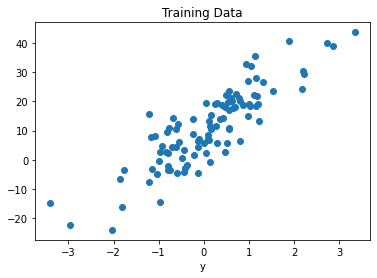

In [ ]:
np.random.seed(17) 
n = 100
x = np.random.randn(n)                # batch size
y = x*10 + 10                         # w=20, b=10 ???
y = y + np.random.randn(n) * 7       # add noise
  
n = len(x) # Number of data points

plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

#### numpy

epoch= 299 error= 44.022409879721536 w= 10.268427094423355 b= 10.0098064211583


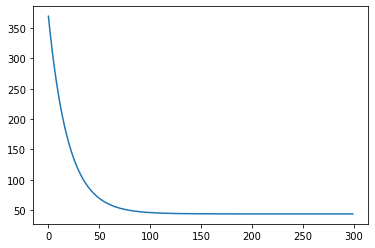

In [ ]:
w=np.random.randn()
b=np.random.randn()

lr = 0.02                               
n_epoch = 300
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w*x + b
    error = ((y_pred - y)**2).mean() 

    w = w - lr* ((y_pred - y)*x).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(error)
        
print('epoch=', epoch, 'error=', error, 'w=', w, 'b=', b)

plt.plot(lossHistory)

#### using tensorflow 1.x (without tensorflow function)

Instructions for updating:
non-resource variables are not supported in the long term
44.02222 10.26762 10.015061


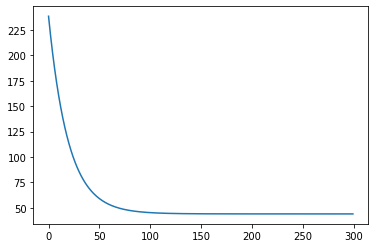

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X = tf.placeholder("float") 
Y = tf.placeholder("float") 
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

learning_rate = 0.02

# Graph
y_pred = X * W + b   # hypothesis
cost = tf.reduce_mean(tf.square(y_pred - Y))

W_gradient = tf.reduce_mean((y_pred - Y) * X)
b_gradient = tf.reduce_mean(y_pred - Y)

W_update = W.assign_sub(learning_rate * W_gradient)
b_update = b.assign_sub(learning_rate * b_gradient)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
lossHistory = []

for i in range(300): 
    sess.run([W_update, b_update], feed_dict={X: x, Y: y})
    cost_val, W_val, b_val = sess.run([cost, W, b], feed_dict={X: x, Y: y})
    
    lossHistory.append(cost_val)

print(cost_val, W_val, b_val)

plt.plot(lossHistory)

#### tensorflow 1.x (with tensorflow function)

44.022305 10.268712 10.012234


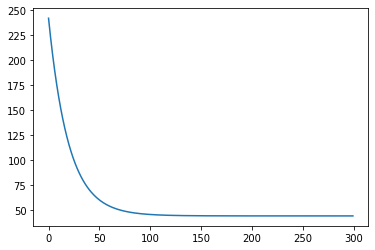

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X = tf.placeholder("float") 
Y = tf.placeholder("float") 

W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

y_pred = X * W + b   # hypothesis
cost = tf.reduce_mean(tf.square(y_pred - Y))   # mse
#####
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#####
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
lossHistory = []
for epoch in range(300): 
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: x, Y: y})
    lossHistory.append(cost_val)
 
print(cost_val, W_val, b_val)
sess.close()

plt.plot(lossHistory)

- We can see the same result.

# Tf 1.0 and Tf 2.0 비교

In [ ]:
# import tensorflow.compat.v1 as tf
# tf.compat.v1.disable_eager_execution()

a = tf.constant(10)
b = tf.constant(20)
c = a + b
print(c)

with tf.Session() as sess:
     print(sess.run (c))

Tensor("add_5:0", shape=(), dtype=int32)
30


In [ ]:
w = tf.Variable(tf.random.normal([1]))
print(w)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(3):
        w = w + 1.0
        print(sess.run(w))

<tf.Variable 'Variable_24:0' shape=(1,) dtype=float32_ref>
[1.134432]
[2.134432]
[3.134432]


In [ ]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

def tensor_sum(x, y):
    return x + y

result = tensor_sum(a, b)   # 함수에 placeholder 를 통해 입력값 전달

with tf.Session() as sess:
    print(sess.run(result, feed_dict={a:[1.0], b:[3.0]}))

[4.]
